<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/lesson_15_MSE_MAE_F1/HW_15_MSE_MAE_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

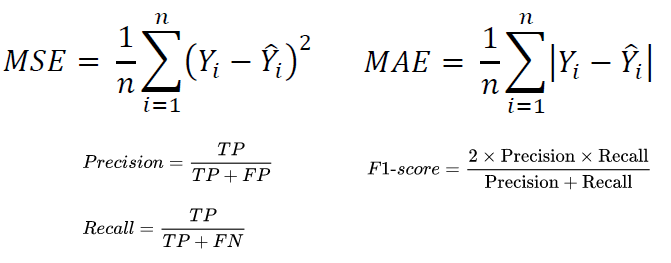

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def mse_err(y, y_pred):
    n = len(y)
    mse = sum((y - y_pred)**2) / n
    return mse


def mae_err(y, y_pred):
    n = len(y)
    mae = sum(abs(y - y_pred))/ n
    return mae


def f1_score(y, y_pred) -> float:
  TP, TN, FP, FN = 0, 0, 0, 0
  for i in range(len(y)):
    if y[i] == 1 and y_pred[i] == 1:
      TP += 1
    if y[i] == 0 and y_pred[i] == 0:
      TN += 1
    if y[i] == 0 and y_pred[i] == 1:
      FP += 1
    if y[i] == 1 and y_pred[i] == 0:
      FN += 1

  f1_precision = TP / (TP + FP)
  f1_recall = TP / (TP + FN)
  f1 = 2 * f1_precision * f1_recall / (f1_precision + f1_recall)
  return f1


def linear_regression(x, y, learning_rate=0.0001, epochs=1000):
  n = len(x)
  w0 = 0
  w1 = 0
  mse_array = []
  for num_epochs in range(epochs):
    y_pred = w0 + w1 * x
    dw0 = (-2 / n) * sum(y - y_pred)
    dw1 = (-2 / n) * sum(x * (y - y_pred))
    w0 -= learning_rate * dw0
    w1 -= learning_rate * dw1
    curr_mse = mse_err(y, y_pred)

    mse_array.append(mse_err(y, y_pred))
    if (len(mse_array) > 1 and abs(mse_array[-1] - mse_array[-2]) > 0.0001) or (len(mse_array) == 1):
      pass
    else:
      break

  return w0, w1, mse_array, num_epochs

In [33]:
# y = np.random.randint(100, size=30)
# y
y = np.array([5, 78, 16, 70, 59, 47, 57, 63, 61,  7, 14, 68, 74, 76, 47, 76, 43,
       90, 30, 63, 58, 80, 10, 25, 64,  7, 85, 17, 79, 95])
y_pred = np.array([7, 77, 18, 73, 54, 48, 55, 64, 62,  6, 16, 62, 78, 78, 44, 74, 42,
       91, 31, 64, 59, 81, 12, 21.3, 62,  3, 84, 16, 78, 94])
mse = mse_err(y, y_pred)
mae = mae_err(y, y_pred)
print(f"MSE = {mse}")
print(f"MAE = {mae}")

MSE = 5.723
MAE = 1.99


In [35]:
y = np.array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
y_pred = np.array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])
f1 = f1_score(y, y_pred)
print(f"F1 score = {f1}")

F1 score = 0.4545454545454546


w0 = 16.47478018547742
w1 = 13.352405240863057
Epoch required: 43658


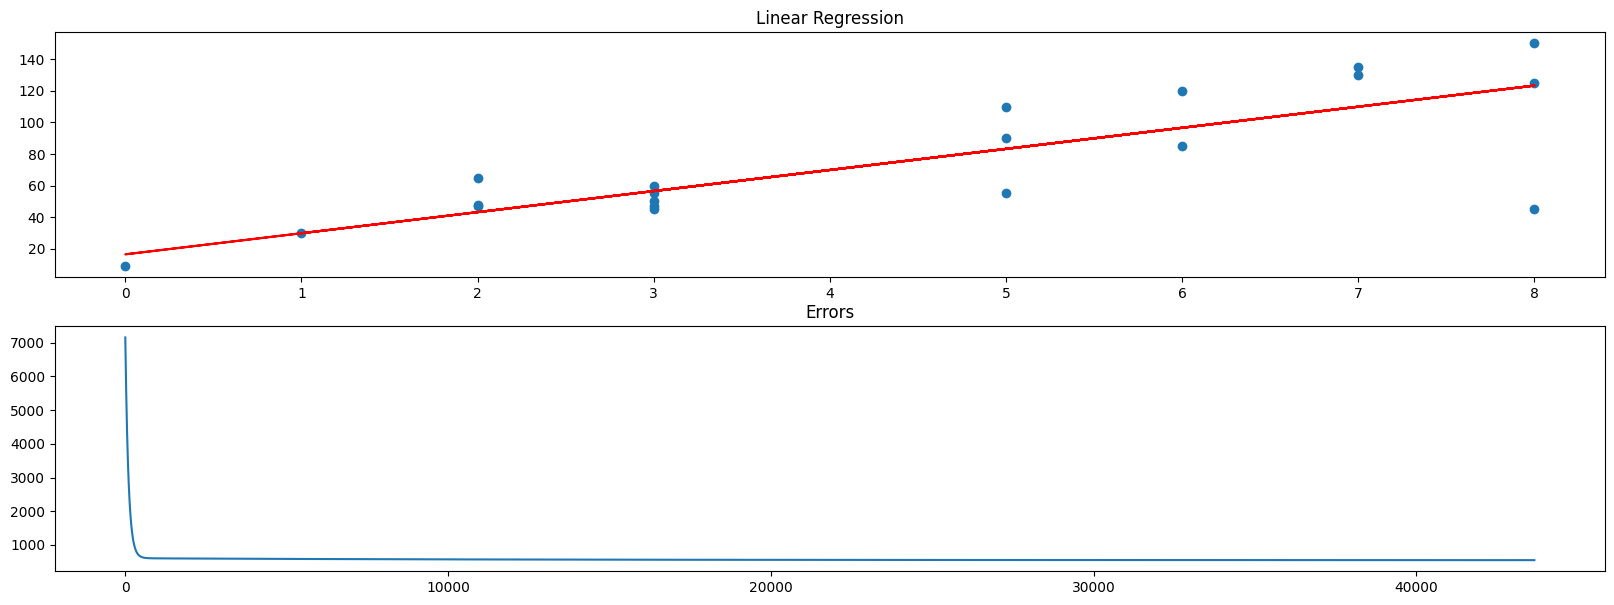

In [129]:
# x = np.random.randint(10, size=30)
# x
# y = np.random.randint(100, size=30)*5
# y
x = np.array([6, 5, 8, 3, 3, 5, 5, 2, 1, 7, 2, 6, 3, 8, 7, 2, 0, 8, 3, 3])
y = np.array([120, 110, 150, 55, 47, 90, 55, 65, 30, 135, 48, 85, 60,  45, 130,  47, 9, 125, 50,  45])

w0, w1, mse_array, num_epochs = linear_regression(x, y, epochs=100000)
print(f"w0 = {w0}")
print(f"w1 = {w1}")
y_pred = w0 + w1 * x
print(f"Epoch required: {num_epochs}")

fig, a = plt.subplots(nrows=2,ncols=1, figsize=(20, 7))
a[0].scatter(x, y)
a[0].plot(x, y_pred, color='red')
a[0].set_title('Linear Regression')
a[1].plot(range(len(mse_array)),mse_array)
a[1].set_title('Errors')
plt.show()
